In [1]:
import imutils
import cv2 as cv
import numpy as np
import random

1. Rotate image by 45 degrees without cropping the sides of the image. (Hint: There are 2 strategies to tackle these problems). Use "lena.jfif" as the input image.
- Use external libraries imutils.
- Modify the transformation matrix.

In [2]:
# Method 1
img = cv.imread('images/lena.jfif')

# Rotate the image using ratate_bound function
rotated_image = imutils.rotate_bound(img, 45)

cv.imshow('Rotated Image using imutils', rotated_image)
cv.waitKey(0)
cv.destroyAllWindows()

In [3]:
# Method 2
(h, w) = img.shape[:2]
(centerX, centerY) = (w // 2, h // 2)

angle = 45

# Calculate the new width and height of the rotated image
new_w = int(h * abs(np.sin(np.radians(angle))) + w * abs(np.cos(np.radians(angle))))
new_h = int(h * abs(np.cos(np.radians(angle))) + w * abs(np.sin(np.radians(angle))))

# Get the rotation matrix
M = cv.getRotationMatrix2D((centerX, centerY), angle, 1.0)

# Modify the rotation matrix to adjust for the translation
M[0, 2] += (new_w / 2) - centerX
M[1, 2] += (new_h / 2) - centerY

# Perform the rotation and adjust for the new dimensions
rotated = cv.warpAffine(img, M, (new_w, new_h))

cv.imshow('rotated', rotated)
cv.waitKey(0)
cv.destroyAllWindows()


2. Use the images with titles: "flower.jfif" and "native-bee.png". I want to put flower above an image. If I add two images, it will change color. If I blend it, I get a transparent effect. But I want it to be opaque. If it was a rectangular region, we could use the ROI as we did in the previous section. But flower is not a rectangular region. This is where bitwise operations, like AND, OR, NOT and XOR really come in handy. The associated functions are cv.bitwise_and(), cv.bitwise_or() and cv.bitwise_not(). You need to use cv.threshold function to segment the flower. Please refer to online documentation for more info. The result should resemble the following:
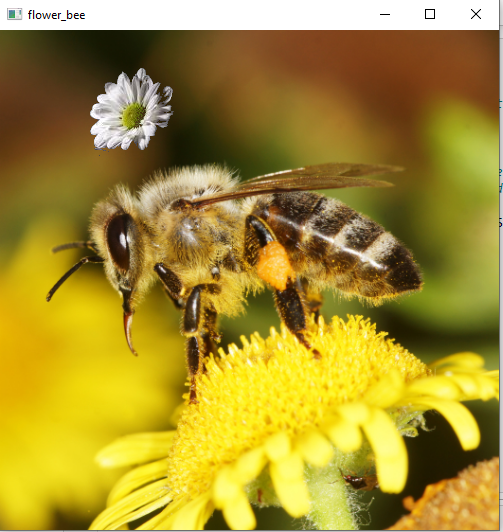

In [4]:
img1 = cv.imread('images/native-bee.png')
img2 = cv.imread('images/flower.jfif')
 
rows,cols,channels = img2.shape
roi = img1[0:rows, 0:cols]

img2gray = cv.cvtColor(img2,cv.COLOR_BGR2GRAY)
mask = cv.threshold(img2gray, 65, 255, cv.THRESH_BINARY)[1]
mask_inv = cv.bitwise_not(mask)
 
img1_bg = cv.bitwise_and(roi,roi,mask = mask_inv)
 
img2_fg = cv.bitwise_and(img2,img2,mask = mask)
 
dst = cv.add(img1_bg,img2_fg)
img1[0:rows, 0:cols ] = dst
 
cv.imshow('res',img1)
cv.waitKey(0)
cv.destroyAllWindows()

3. Write a function that randomly crop the central region of an image. The method signature should be as shown in the following:
``` python
random_center_crop(image, min_crop_ratio, max_crop_ratio)
```

In [5]:
img = cv.imread("images/flower.jfif")
min_crop_ratio = 0.1
max_crop_ratio = 0.4

h, w = img.shape[:2]

# Generate a random crop ratio between min_crop_ratio and max_crop_ratio
crop_ratio = random.uniform(min_crop_ratio, max_crop_ratio)

# Compute the dimensions of the cropped region
crop_h = int(h * crop_ratio)
crop_w = int(w * crop_ratio)

# Compute the coordinates of the top-left corner of the cropped region
start_x = (w - crop_w) // 2
start_y = (h - crop_h) // 2

# Crop the image
cropped = img[start_y:start_y + crop_h, start_x:start_x + crop_w]

cv.imshow("original", img)
cv.imshow("cropped", cropped)
cv.waitKey(0)
cv.destroyAllWindows()


4. Aside from Gaussian noise, name another common type of noise. Write the code to demonstrate how the noise can be included in an image.

In [6]:
img = cv.imread("images/lena.jfif")
noisy_image = np.copy(img)
total_pixels = img.shape[0] * img.shape[1]

# Percentage of black and white pixels
salt_prob = 0.07 
pepper_prob = 0.1 

# Add white pixel
num_salt = np.ceil(salt_prob * total_pixels).astype(int)
coords_salt = [np.random.randint(0, i, num_salt) for i in img.shape]
noisy_image[coords_salt[0], coords_salt[1], :] = 255

# Add black pixel
num_pepper = np.ceil(pepper_prob * total_pixels).astype(int)
coords_pepper = [np.random.randint(0, i, num_pepper) for i in img.shape]
noisy_image[coords_pepper[0], coords_pepper[1], :] = 0

cv.imshow('noisy image', noisy_image)
cv.waitKey(0)
cv.destroyAllWindows()
